In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.LOADING OF DATASET

In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Dataset/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


3.PERFORMING DATA VISUALIZATION

(i)UNIVARIATE ANALYSIS

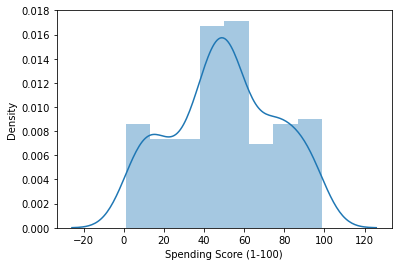

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.distplot(df['Spending Score (1-100)'])

(ii)BIVARIATE ANALYSIS

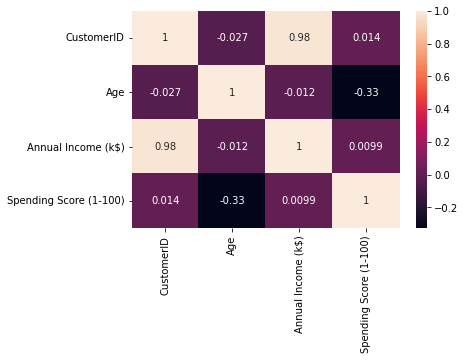

In [5]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)
plt.show()

(iii)MULTIVARIATE ANALYSIS

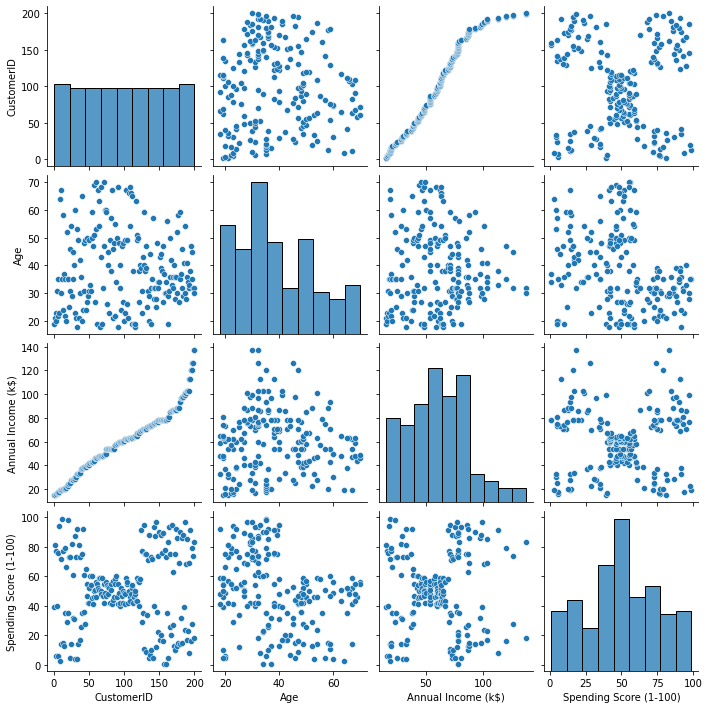

In [6]:
sns.pairplot(df)
plt.show()

4.PERFORMING DESCRIPTIVE STATISTICS ON THE DATASET

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


5.CHECKING FOR MISSING VALUES AND DEALING WITH THEM

In [8]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

6.FINDING THE OUTLIERS AND REPLACING THEM

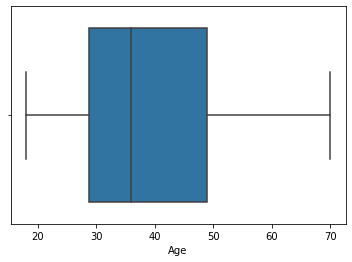

In [10]:
sns.boxplot(x='Age',data=df)

In [ ]:
Q1=df.Age.quantile(0.25)
Q2=df.Age.quantile(0.30)
IQR=Q2-Q1
print(IQR)

1.25


In [ ]:
A=df[~((df.Age<(Q1-2.50*IQR))|(df.Age>(Q2+2.50*IQR)))]
print(A)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
4             5  Female   31                  17                      40
9            10  Female   30                  19                      72
23           24    Male   31                  25                      73
25           26    Male   29                  28                      82
37           38  Female   30                  34                      73
43           44  Female   31                  39                      61
47           48  Female   27                  40                      47
48           49  Female   29                  40                      42
49           50  Female   31                  40                      42
51           52    Male   33                  42                      60
52           53  Female   31                  43                      54
58           59  Female   27                  46                      51
69           70  Female   32                  48   

7.CHECKING FOR CATEGORICAL COLUMNS AND PERFORMING ENCODING

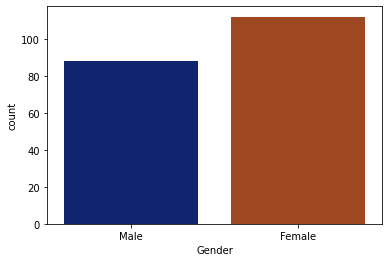

In [14]:
sns.countplot(x='Gender', data=df, palette="dark")

8.SCALING THE DATA

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=df[['Annual Income (k$)','Spending Score (1-100)']]
scaledx=scale.fit_transform(x)
print(scaledx)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

9.PERFORMING CLUSTERING ALGORITHM

In [ ]:
data_mapped=df.copy()
data_mapped['Gender']=data_mapped['Gender'].map({'Female':0,'Male':1})
print(data_mapped)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


In [ ]:
x=data_mapped.iloc[:,1:2]
print(x)

     Gender
0         1
1         1
2         0
3         0
4         0
..      ...
195       0
196       0
197       1
198       1
199       1

[200 rows x 1 columns]


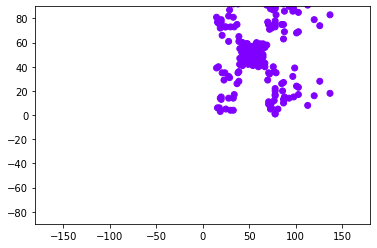

In [ ]:
kmeans=KMeans(1)
kmeans.fit(x)
identified_clusters=kmeans.fit_predict(x)
data_with_clusters=data_mapped.copy()
data_with_clusters['Cluster']=identified_clusters
plt.scatter(data_with_clusters['Annual Income (k$)'],data_with_clusters['Spending Score (1-100)'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

10.ADDING THE CLUSTER DATA WITH THE PRIMARY DATASET

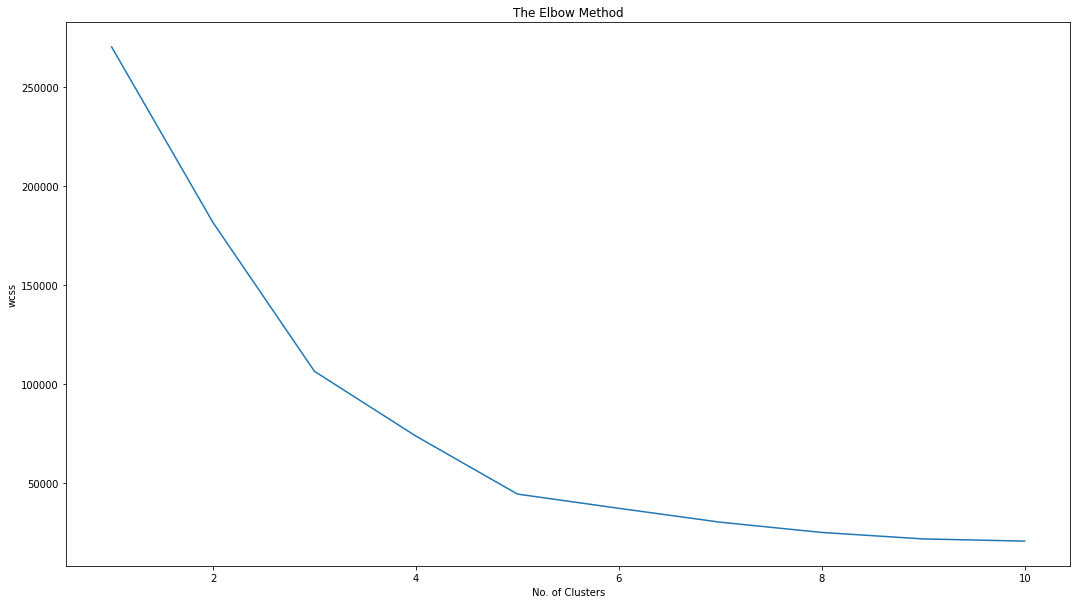

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

11.SPLITTING THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [ ]:
dependent=df.iloc[0:,3:5].values 
print(dependent)


[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
independent=df.iloc[0:,0:3].values
print(independent)

[[1 'Male' 19]
 [2 'Male' 21]
 [3 'Female' 20]
 [4 'Female' 23]
 [5 'Female' 31]
 [6 'Female' 22]
 [7 'Female' 35]
 [8 'Female' 23]
 [9 'Male' 64]
 [10 'Female' 30]
 [11 'Male' 67]
 [12 'Female' 35]
 [13 'Female' 58]
 [14 'Female' 24]
 [15 'Male' 37]
 [16 'Male' 22]
 [17 'Female' 35]
 [18 'Male' 20]
 [19 'Male' 52]
 [20 'Female' 35]
 [21 'Male' 35]
 [22 'Male' 25]
 [23 'Female' 46]
 [24 'Male' 31]
 [25 'Female' 54]
 [26 'Male' 29]
 [27 'Female' 45]
 [28 'Male' 35]
 [29 'Female' 40]
 [30 'Female' 23]
 [31 'Male' 60]
 [32 'Female' 21]
 [33 'Male' 53]
 [34 'Male' 18]
 [35 'Female' 49]
 [36 'Female' 21]
 [37 'Female' 42]
 [38 'Female' 30]
 [39 'Female' 36]
 [40 'Female' 20]
 [41 'Female' 65]
 [42 'Male' 24]
 [43 'Male' 48]
 [44 'Female' 31]
 [45 'Female' 49]
 [46 'Female' 24]
 [47 'Female' 50]
 [48 'Female' 27]
 [49 'Female' 29]
 [50 'Female' 31]
 [51 'Female' 49]
 [52 'Male' 33]
 [53 'Female' 31]
 [54 'Male' 59]
 [55 'Female' 50]
 [56 'Male' 47]
 [57 'Female' 51]
 [58 'Male' 69]
 [59 'Fem

12.SPLITTING THE DATA INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dependent,independent,test_size=0.4,random_state=0)
print("x_train")
print(x_train)
print("x_test")
print(x_test)
print("y_train")
print(y_train)
print("y_test")
print(y_test)

x_train
[[101  68]
 [ 40  55]
 [ 74  10]
 [120  79]
 [ 63  43]
 [ 47  52]
 [ 16   6]
 [ 46  46]
 [ 73   7]
 [126  74]
 [ 39  61]
 [ 19  14]
 [120  16]
 [ 50  56]
 [126  28]
 [ 93  14]
 [ 88  86]
 [ 71  35]
 [ 60  40]
 [ 64  42]
 [ 78   1]
 [103  69]
 [ 42  52]
 [ 15  39]
 [ 60  42]
 [ 63  52]
 [ 60  52]
 [ 48  51]
 [ 86  95]
 [ 38  92]
 [ 48  47]
 [ 40  42]
 [ 40  42]
 [ 54  46]
 [ 20  77]
 [ 79  83]
 [ 25  73]
 [101  24]
 [ 73  88]
 [ 24  35]
 [ 20  79]
 [ 54  52]
 [ 62  56]
 [ 43  54]
 [ 62  41]
 [ 54  53]
 [ 16  77]
 [ 65  43]
 [ 85  26]
 [137  18]
 [ 18   6]
 [ 48  59]
 [ 54  57]
 [ 67  40]
 [ 78  89]
 [ 87  75]
 [ 78   1]
 [ 59  41]
 [137  83]
 [ 19  99]
 [ 67  57]
 [ 62  59]
 [ 33  81]
 [ 44  46]
 [ 48  59]
 [ 15  81]
 [ 67  56]
 [ 81   5]
 [ 39  36]
 [ 62  42]
 [ 72  34]
 [ 87  92]
 [ 21  66]
 [ 37  26]
 [ 72  71]
 [ 43  60]
 [ 78  78]
 [ 71  11]
 [ 33  14]
 [ 29  31]
 [ 65  48]
 [ 78  88]
 [ 30  73]
 [ 86  20]
 [ 71  95]
 [ 88  15]
 [ 33   4]
 [ 76  40]
 [ 87  63]
 [ 77  74]
 [

13.BUILDING THE MODEL

Text(0.5, 1.0, 'Age Vs Annual Income Vs Spending Score')

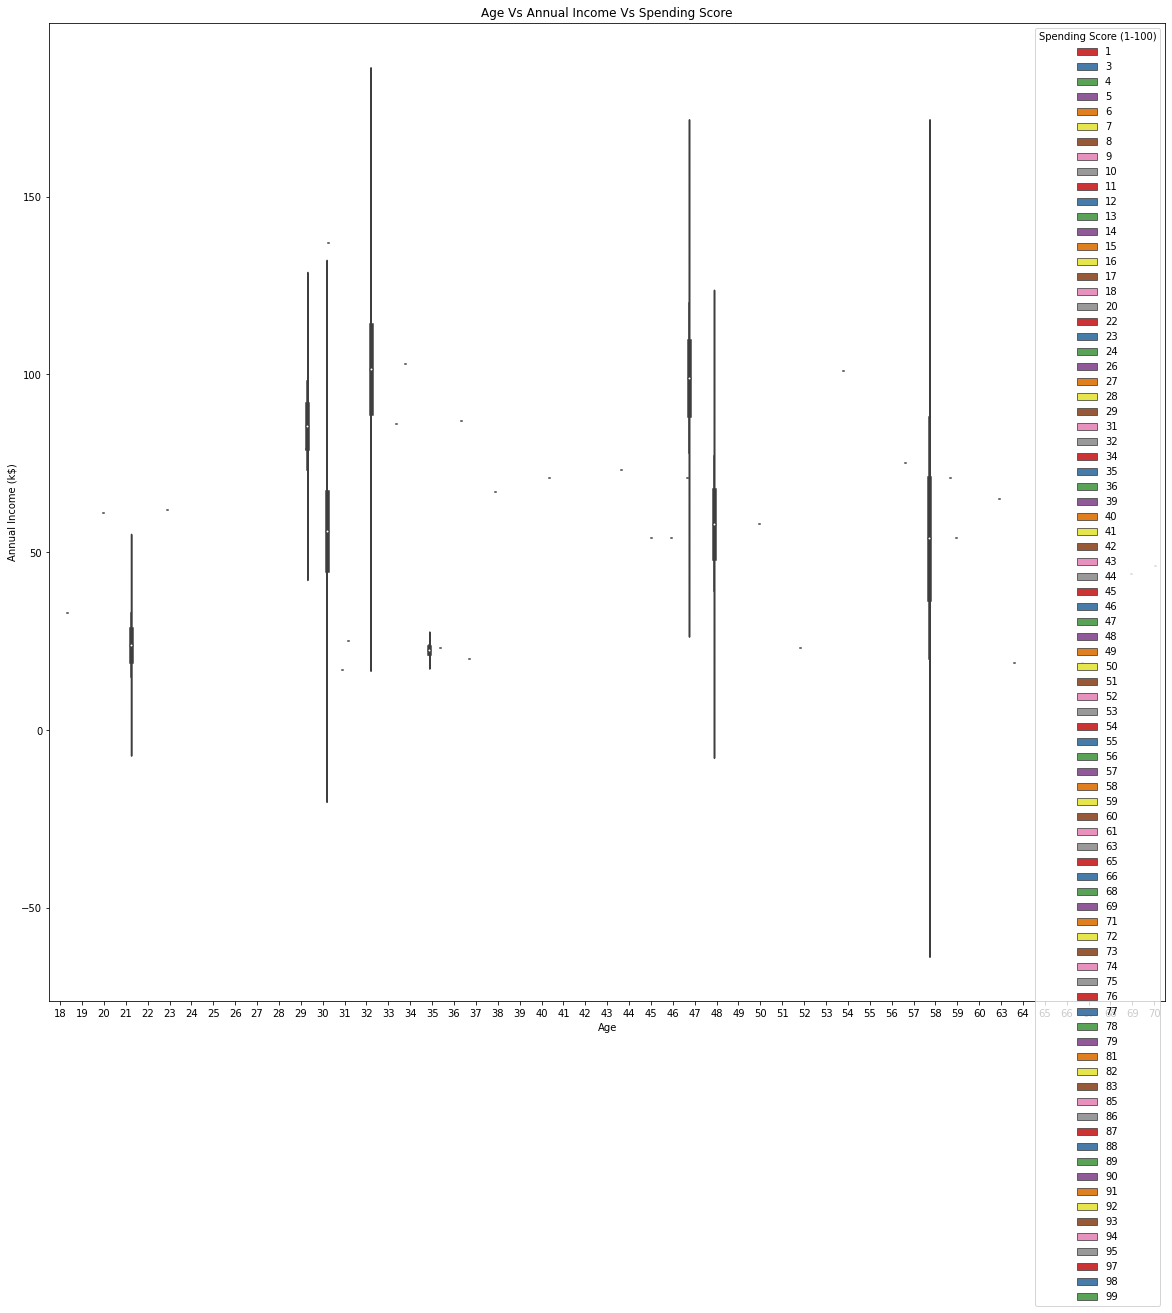

In [ ]:

plt.rcParams['figure.figsize']=(20,18)
sns.violinplot(df['Age'],df['Annual Income (k$)'],hue=df['Spending Score (1-100)'],palette='Set1')
plt.title('Age Vs Annual Income Vs Spending Score')

Text(0.5, 1.0, 'Age Vs Annual Income')

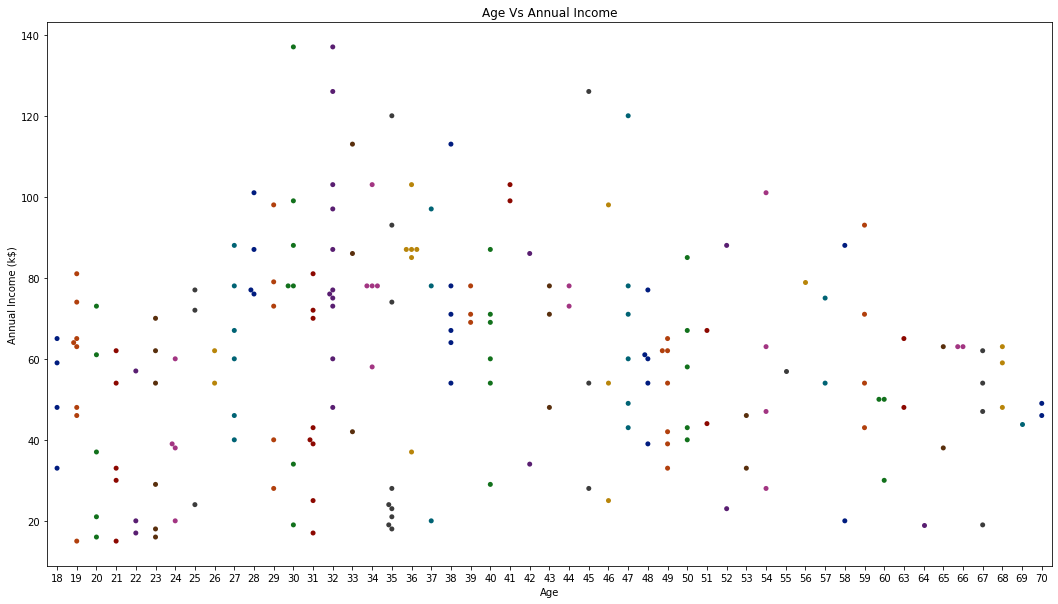

In [ ]:
plt.rcParams['figure.figsize']=(18,10)
sns.swarmplot(df['Age'],df['Annual Income (k$)'],palette='dark')
plt.title('Age Vs Annual Income')

14.TRAINING THE MODEL

In [ ]:
print("Shape of x_train:",x_train.shape)
print("Shape of y_train:",y_train.shape)

Shape of x_train: (120, 2)
Shape of y_train: (120, 3)


15.TESTING THE MODEL

In [ ]:
print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_test: (80, 2)
Shape of y_test: (80, 3)


16.MEASURING THE PERFORMANCE USING METRICS

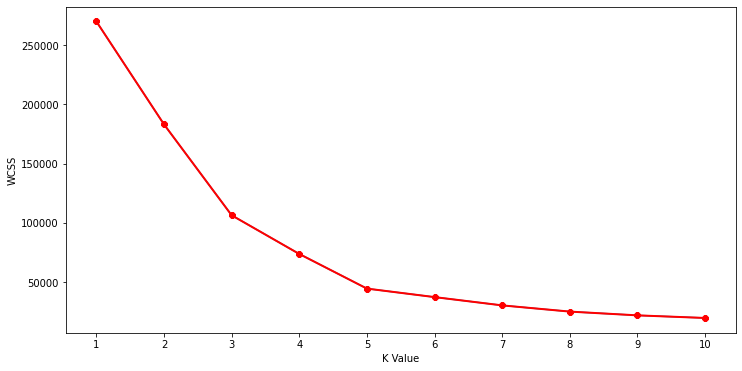

In [21]:
from sklearn.cluster import KMeans
import numpy as np
df1=df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

